In [1]:
#Van Rodolf Suliva and Ken Sevilla
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'school start time.csv'
pd.set_option('display.float_format', '{:.3f}'.format)
data = pd.read_csv(file_path)


In [2]:
data = pd.read_csv(file_path)

data['School_Start_Time'] = pd.to_datetime(data['School_Start_Time'], format='%H:%M').dt.hour * 60 + pd.to_datetime(data['School_Start_Time'], format='%H:%M').dt.minute

# Show the first few rows to verify the conversion
data[['School_Start_Time']].head()


,School_Start_Time
0,540
1,600
2,600
3,510
4,540


In [3]:

#Basic Measures of Central Tendency of the Population Data 

def format_statistics(stats):
    return {key: round(value, 3) for key, value in stats.items()}

def compute_statistics(series):
    """Compute mean, median, mode, and range of a pandas Series."""
    mean = series.mean()
    median = series.median()
    mode = series.mode()[0]  
    range_val = series.max() - series.min()
    return mean, median, mode, range_val


gwa_stats_formatted = format_statistics(dict(zip(['Mean', 'Median', 'Mode', 'Range'], compute_statistics(data['GWA']))))
academic_performance_stats_formatted = format_statistics(dict(zip(['Mean', 'Median', 'Mode', 'Range'], compute_statistics(data['Academic_Performance_Score']))))
sleep_hours_stats_formatted = format_statistics(dict(zip(['Mean', 'Median', 'Mode', 'Range'], compute_statistics(data['Sleep_Hours']))))


mean_school_start_time_hours = data['School_Start_Time'].mean() / 60
median_school_start_time_hours = data['School_Start_Time'].median() / 60
mode_school_start_time_hours = data['School_Start_Time'].mode().iloc[0] / 60 
range_school_start_time_hours = (data['School_Start_Time'].max() - data['School_Start_Time'].min()) / 60

school_start_time_stats_formatted = format_statistics({
    'Mean (hours)': mean_school_start_time_hours,
    'Median (hours)': median_school_start_time_hours,
    'Mode (hours)': mode_school_start_time_hours,
    'Range (hours)': range_school_start_time_hours
})


all_statistics_formatted = {
    'GWA': gwa_stats_formatted,
    'Academic_Performance_Score': academic_performance_stats_formatted,
    'Sleep_Hours': sleep_hours_stats_formatted,
    'School_Start_Time': school_start_time_stats_formatted
}

all_statistics_formatted


{'GWA': {'Mean': 2.55, 'Median': 2.595, 'Mode': 1.34, 'Range': 2.93},
 'Academic_Performance_Score': {'Mean': 75.81,
  'Median': 76.71,
  'Mode': 85.73,
  'Range': 44.49},
 'Sleep_Hours': {'Mean': 6.897, 'Median': 6.8, 'Mode': 6.2, 'Range': 6.0},
 'School_Start_Time': {'Mean (hours)': 9.14,
  'Median (hours)': 9.0,
  'Mode (hours)': 10.0,
  'Range (hours)': 2.0}}

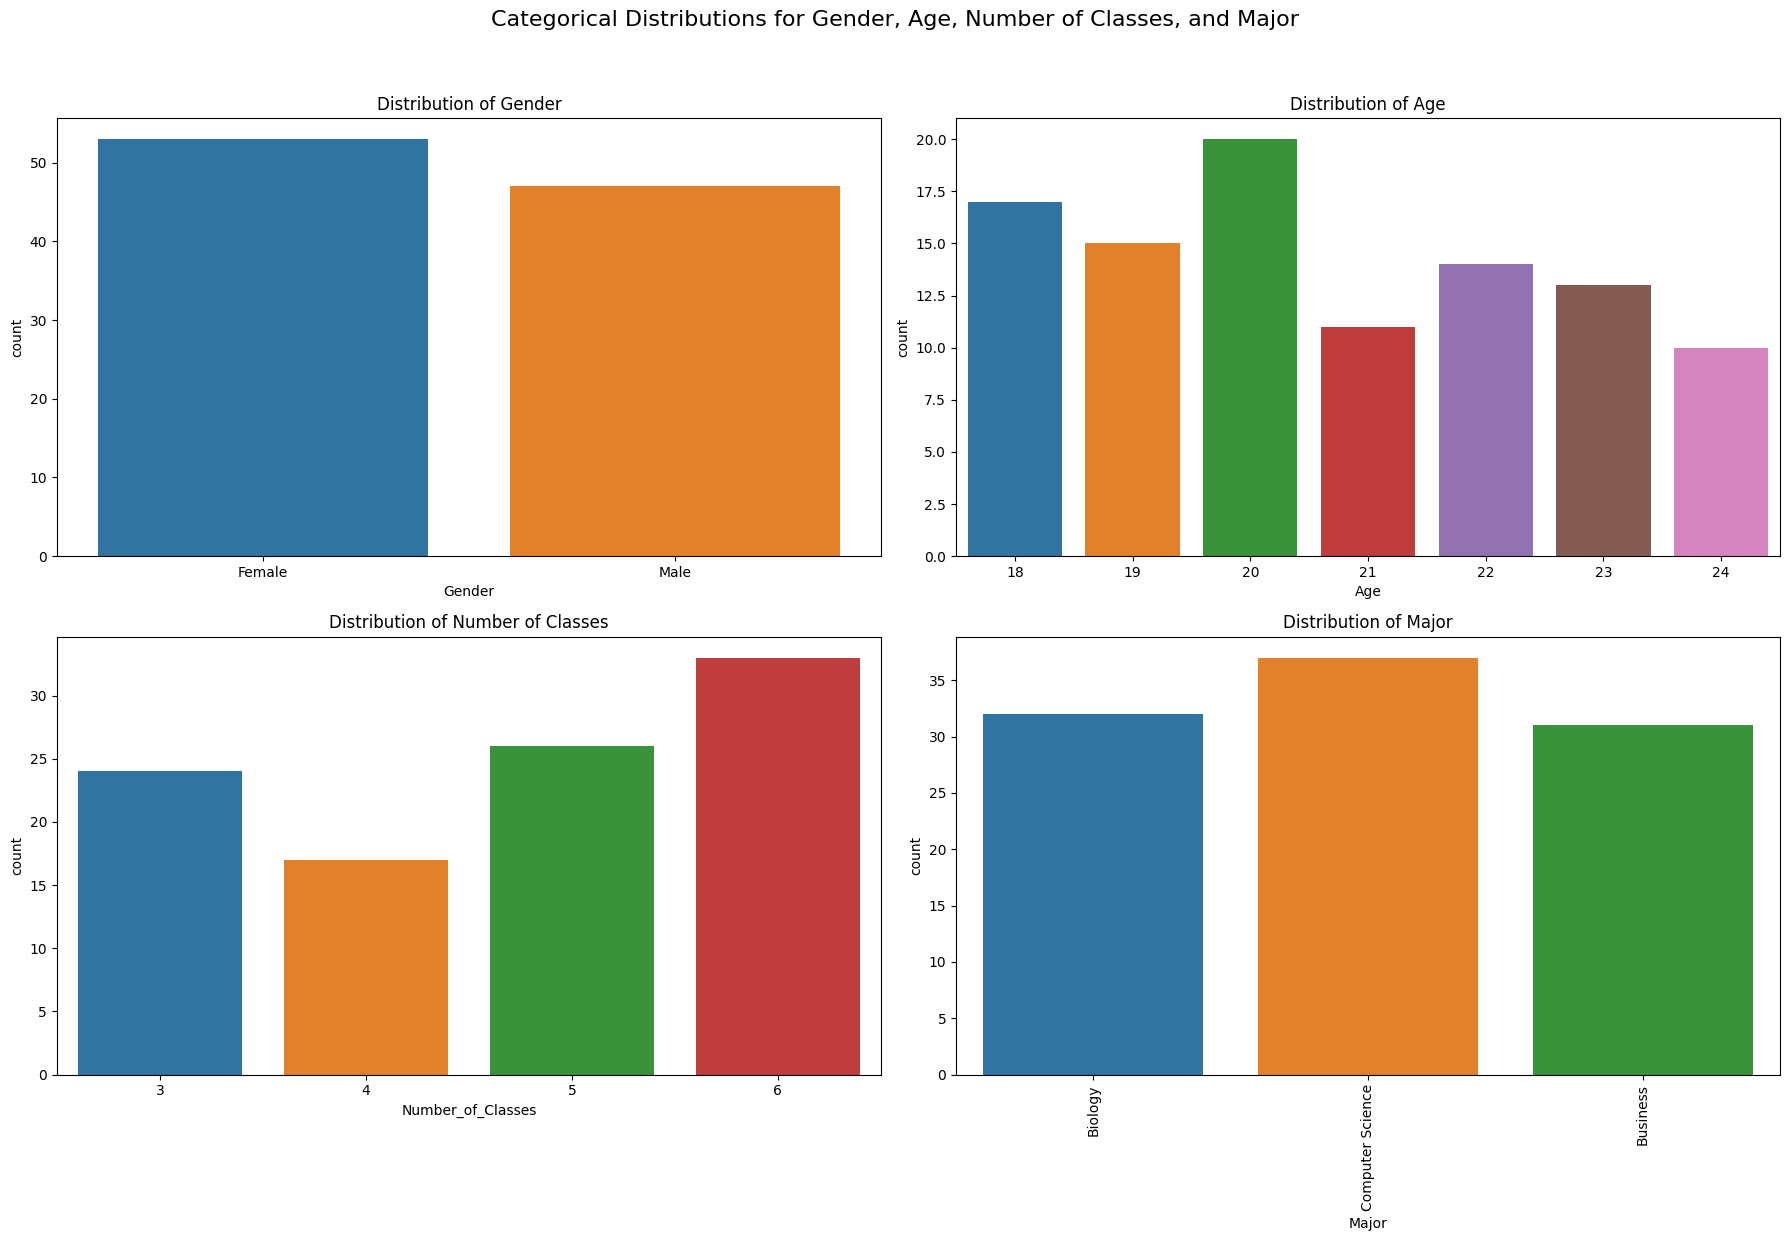

In [4]:

fig, axes = plt.subplots(2, 2, figsize=(18, 12))


fig.suptitle('Categorical Distributions for Gender, Age, Number of Classes, and Major', y=1.03, fontsize=16)


sns.countplot(x="Gender", data=data, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Gender")


sns.countplot(x="Age", data=data, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Age")


sns.countplot(x="Number_of_Classes", data=data, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Number of Classes")


sns.countplot(x="Major", data=data, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Major")
axes[1, 1].tick_params(axis='x', rotation=90)  


plt.tight_layout()


plt.show()


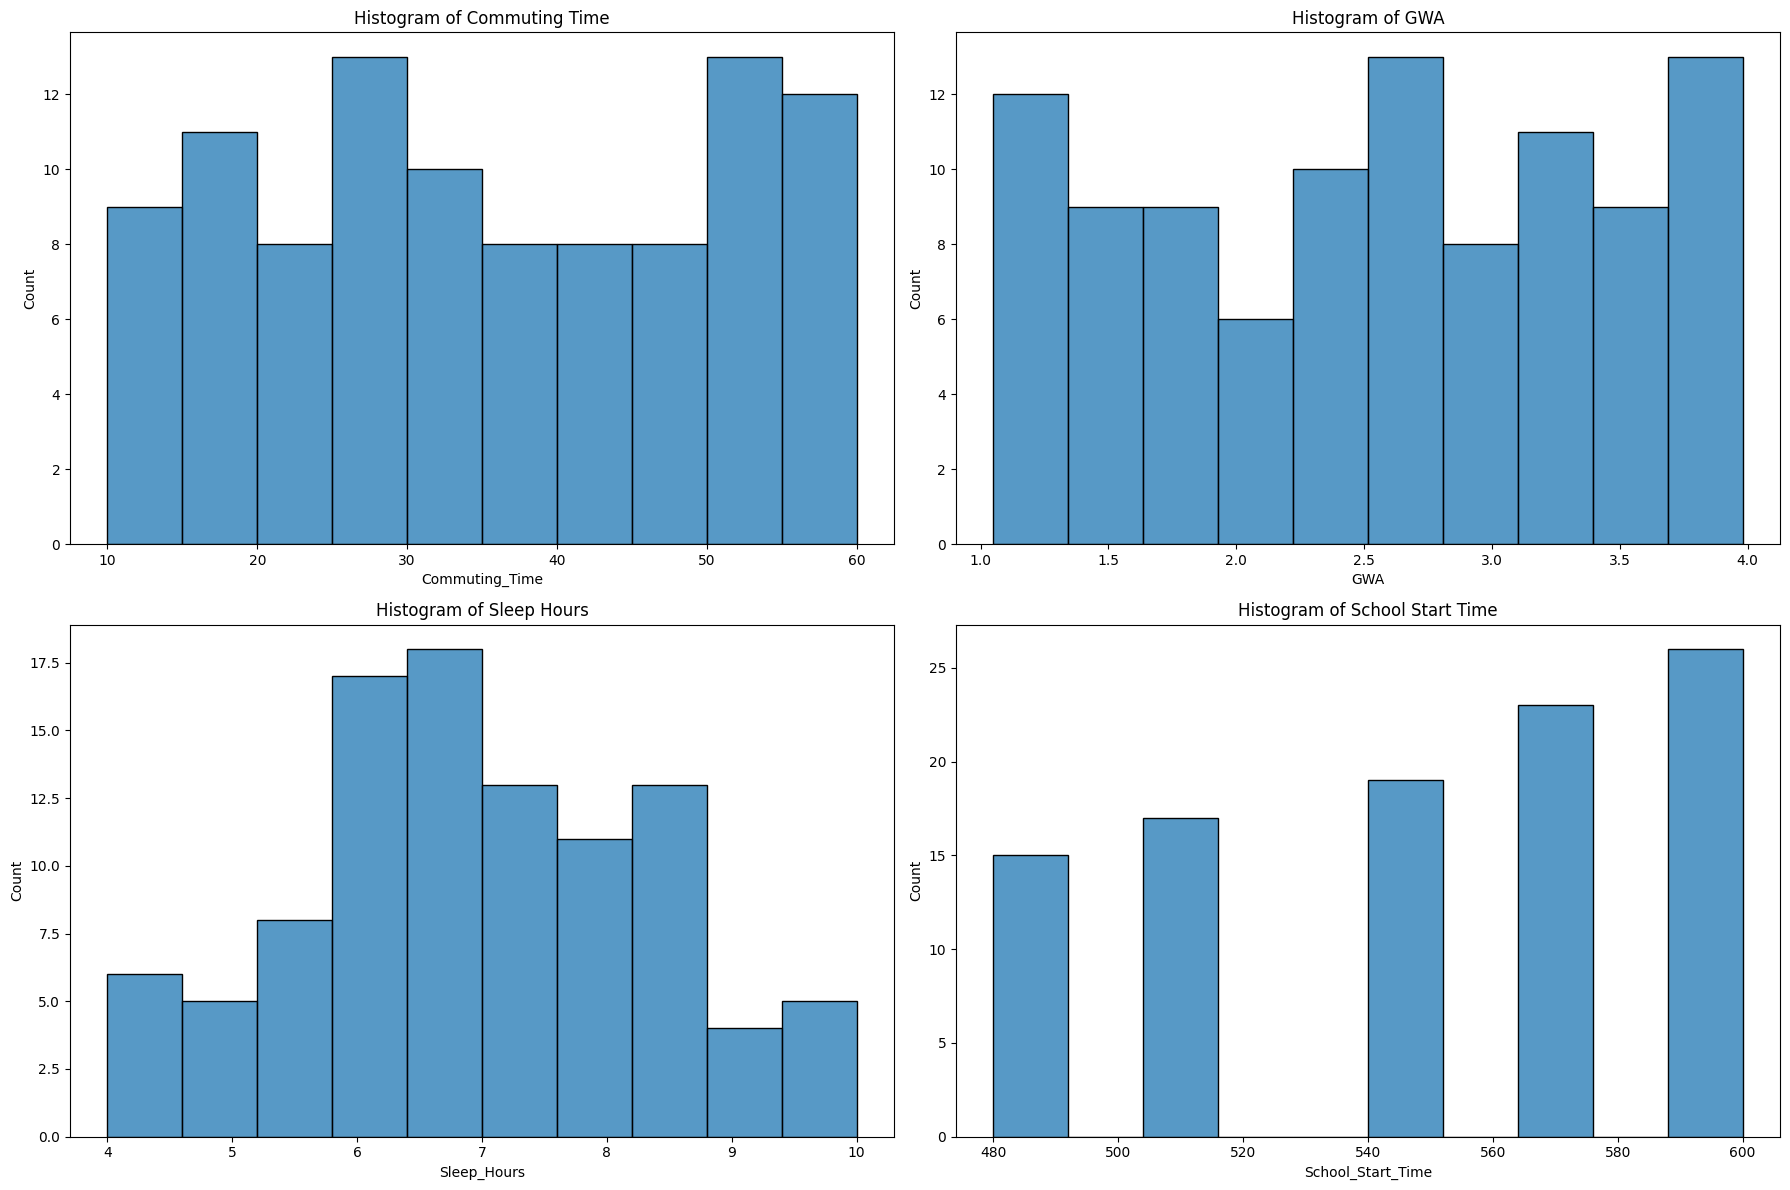

In [5]:

fig, axes = plt.subplots(2, 2, figsize=(18, 12))


sns.histplot(data['Commuting_Time'], bins=10, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Commuting Time')


sns.histplot(data['GWA'], bins=10, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of GWA')


sns.histplot(data['Sleep_Hours'], bins=10, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Sleep Hours')


sns.histplot(data['School_Start_Time'], bins=10, kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Histogram of School Start Time')


plt.tight_layout()


plt.show()

In [6]:
population_mean = data['Academic_Performance_Score'].mean()
population_std_dev = data['Academic_Performance_Score'].std()

print(population_mean, population_std_dev)

75.8096 10.835124413245335


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9fd4be2e-dfa0-4ea1-b17e-927904ab46d5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>